In [ ]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
full_df = pd.read_csv("/content/drive/My Drive/DS266/Final Project/data/absa_features_target.csv")

In [ ]:
full_df.head()

,Ticker,Drug,Indication,Stage,Date,Catalyst,Shares_Millions,Market_Cap,Volatility,Share_Price_D-1,...,has_regulatory,has_financial,has_enrollment,has_clinical,has_catalyst,pos_count,neg_count,neu_count,headline_sentiment,TARGET
0,SNDX,Niktimvo (axatilimab-csfr),Chronic Graft versus host disease (cGvHD)Â,BLA Filing,2024-01-02,"BLA submitteed to the FDA, noted January 2, 2024.",86.0,1853.94083,47.8089,21.61000,...,1,0,0,0,0,1,0,0,1,pos
1,INCY,Niktimvo (axatilimab-csfr),Chronic Graft versus host disease (cGvHD)Â,BLA Filing,2024-01-02,"BLA submitteed to the FDA, noted January 2, 2024.",195.0,14667.94963,26.2121,62.79000,...,1,0,0,0,0,1,0,0,1,pos
2,ATAI,EMP-01,Post-Traumatic Stress Disorder (PTSD)Â,Phase 1,2024-01-02,"Phase 1 was well-tolerated, and treatment-rela...",214.0,280.55770,76.7738,1.41000,...,0,0,0,0,0,2,0,0,1,pos
3,AVXL,ANAVEX 2-73-RS-003 - (EXCELLENCE),Pediatric Rett SyndromeÂ,Phase 2/3,2024-01-02,Phase 2/3 results missed a primary endpoint on...,85.0,496.21296,88.6481,9.31000,...,0,0,0,0,0,0,3,0,-1,neg
4,ATXI,AJ201,Spinal and bulbar muscular atrophy (SBMA)Â,Phase 1/2,2024-01-02,"Phase 1b/2 enrollment completed, noted January...",3.0,2.11961,106.4138,12.07503,...,0,0,1,0,0,2,0,0,1,pos


### Evaluating the length of the catalyst entries

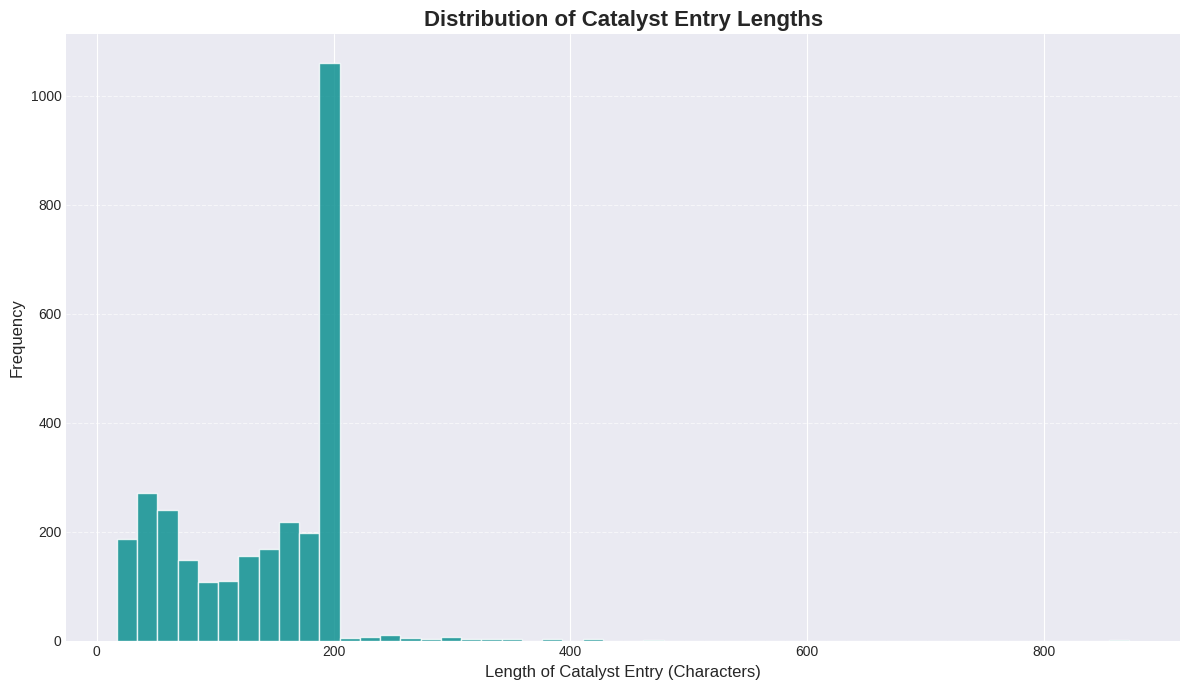

In [ ]:
catalyst_lengths = full_df['Catalyst'].apply(len)

# Apply a style for a prettier look
plt.style.use('seaborn-v0_8-darkgrid') # Using a seaborn style for enhanced aesthetics

plt.figure(figsize=(12, 7)) # Slightly larger figure for better readability
plt.hist(catalyst_lengths, bins=50, color='darkcyan', edgecolor='white', alpha=0.8) # Changed color, added white edge, and alpha

plt.title('Distribution of Catalyst Entry Lengths', fontsize=16, fontweight='bold') # Emphasize title
plt.xlabel('Length of Catalyst Entry (Characters)', fontsize=12) # Emphasize x-label
plt.ylabel('Frequency', fontsize=12) # Emphasize y-label
plt.xticks(fontsize=10) # Adjust tick font size
plt.yticks(fontsize=10) # Adjust tick font size

plt.grid(axis='y', linestyle='--', alpha=0.6) # Slightly different grid style

plt.tight_layout()
plt.savefig("/content/drive/My Drive/DS266/Final Project/BERT-BASE/out/catalyst_length_histogram.png", dpi=300)
plt.show()

### Evaluating the Returns at Day 5 (unadjusted to the XBI index)

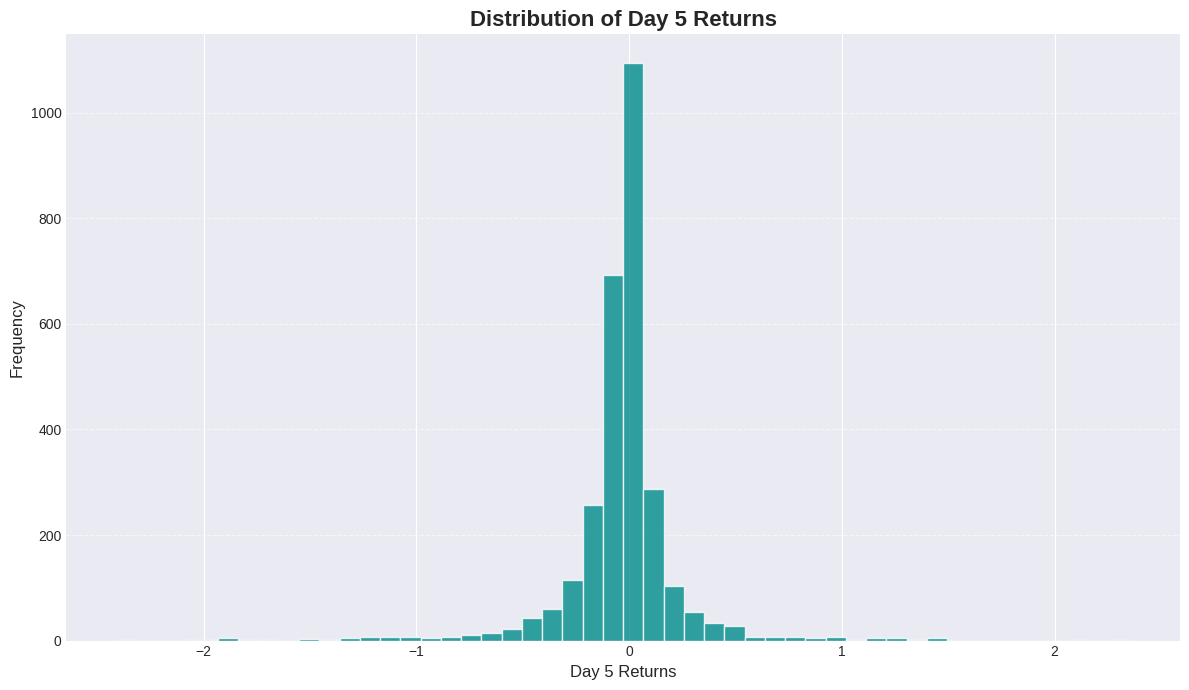

In [ ]:
D5_returns = full_df['Perc_Return_D5']

# Apply a style for a prettier look
plt.style.use('seaborn-v0_8-darkgrid') # Using a seaborn style for enhanced aesthetics

plt.figure(figsize=(12, 7)) # Slightly larger figure for better readability
plt.hist(D5_returns, bins=50, color='darkcyan', edgecolor='white', alpha=0.8) # Changed color, added white edge, and alpha

plt.title('Distribution of Day 5 Returns', fontsize=16, fontweight='bold') # Emphasize title
plt.xlabel('Day 5 Returns', fontsize=12) # Emphasize x-label
plt.ylabel('Frequency', fontsize=12) # Emphasize y-label
plt.xticks(fontsize=10) # Adjust tick font size
plt.yticks(fontsize=10) # Adjust tick font size

plt.grid(axis='y', linestyle='--', alpha=0.6) # Slightly different grid style

plt.tight_layout()
plt.savefig("/content/drive/My Drive/DS266/Final Project/BERT-BASE/out/5day_return_histogram.png", dpi=300)
plt.show()

### Understanding the difference between positive classifications based on keywords versus stock movement
Preliminary observations:
- There seems to be overlap in the stock movement and the classification based on keywords of the positive class
- It seems that neutral typically move negative and negative moves negative

This needs to be confirmed with a table of counts of each

In [ ]:
# Filter the DataFrame for headline_sentiment = 1 and -1
returns_sentiment_pos = full_df[full_df['headline_sentiment'] == 1]
returns_sentiment_neg = full_df[full_df['headline_sentiment'] == -1]
returns_sentiment_neu = full_df[full_df['headline_sentiment'] == 0]
print(f"The number of rows that are positive sentiment based on key words: {len(returns_sentiment_pos)}")
print(f"The number of rows that are negative sentiment based on key words: {len(returns_sentiment_neg)}")
print(f"The number of rows that are neutral sentiment based on key words: {len(returns_sentiment_neu)}")

The number of rows that are positive sentiment based on key words: 1230
The number of rows that are negative sentiment based on key words: 133
The number of rows that are neutral sentiment based on key words: 1547


In [ ]:
print(f"The number of rows classified as positive based on stock movement: {sum(full_df['TARGET']=="pos")}")
print(f"The number of rows classified as negative based on stock movement: {sum(full_df['TARGET']=="neg")}")

The number of rows classified as positive based on stock movement: 1233
The number of rows classified as negative based on stock movement: 1677


### Distribution of the Day 5 returns based on positive, negative and neutral keywords
There seems to be a normal distribution of positive and neutral, although there is a normal ish with a left skew for the negative classifications. There is much more data in the positive and neutral classes, versus the negative class. Across the three classes, the mean of the return is close to 0, indicating that there may not be much difference, especially in the neutral and positive class where the skewness is minimal. In the negative bin, there is much more skewness indicating that negative news is much more likely to results in negative stock movement and the degree of movement is much more.

In [ ]:
full_df.columns

Index(['Ticker', 'Drug', 'Indication', 'Stage', 'Date', 'Catalyst',
       'Shares_Millions', 'Market_Cap', 'Volatility', 'Share_Price_D-1',
       'Share_Price_D1', 'Share_Price_D5', 'Perc_Return_D1', 'Perc_Return_D5',
       'XBI_Return_D1', 'XBI_Return_D5', 'Short_Interest_Pct', 'Year_Beta',
       'Daily_Volum_Traded', 'row_id', 'has_endpoint', 'has_pvalue',
       'has_effect', 'has_safety', 'has_sample', 'has_phase', 'has_partner',
       'has_regulatory', 'has_financial', 'has_enrollment', 'has_clinical',
       'has_catalyst', 'pos_count', 'neg_count', 'neu_count',
       'headline_sentiment', 'TARGET'],
      dtype='object')

In [ ]:
# Calculate the actual return from the event accounting for the biotech market as a whole
full_df['XBI_adjusted_Perc_Return_D1'] = full_df['Perc_Return_D1']-full_df['XBI_Return_D1']
full_df['XBI_adjusted_Perc_Return_D5'] = full_df['Perc_Return_D5']-full_df['XBI_Return_D5']

In [ ]:
# Filter the DataFrame for headline_sentiment = 1 and -1
returns_sentiment_pos = full_df[full_df['headline_sentiment'] == 1]['XBI_adjusted_Perc_Return_D5']
returns_sentiment_neg = full_df[full_df['headline_sentiment'] == -1]['XBI_adjusted_Perc_Return_D5']
returns_sentiment_neu = full_df[full_df['headline_sentiment'] == 0]['XBI_adjusted_Perc_Return_D5']

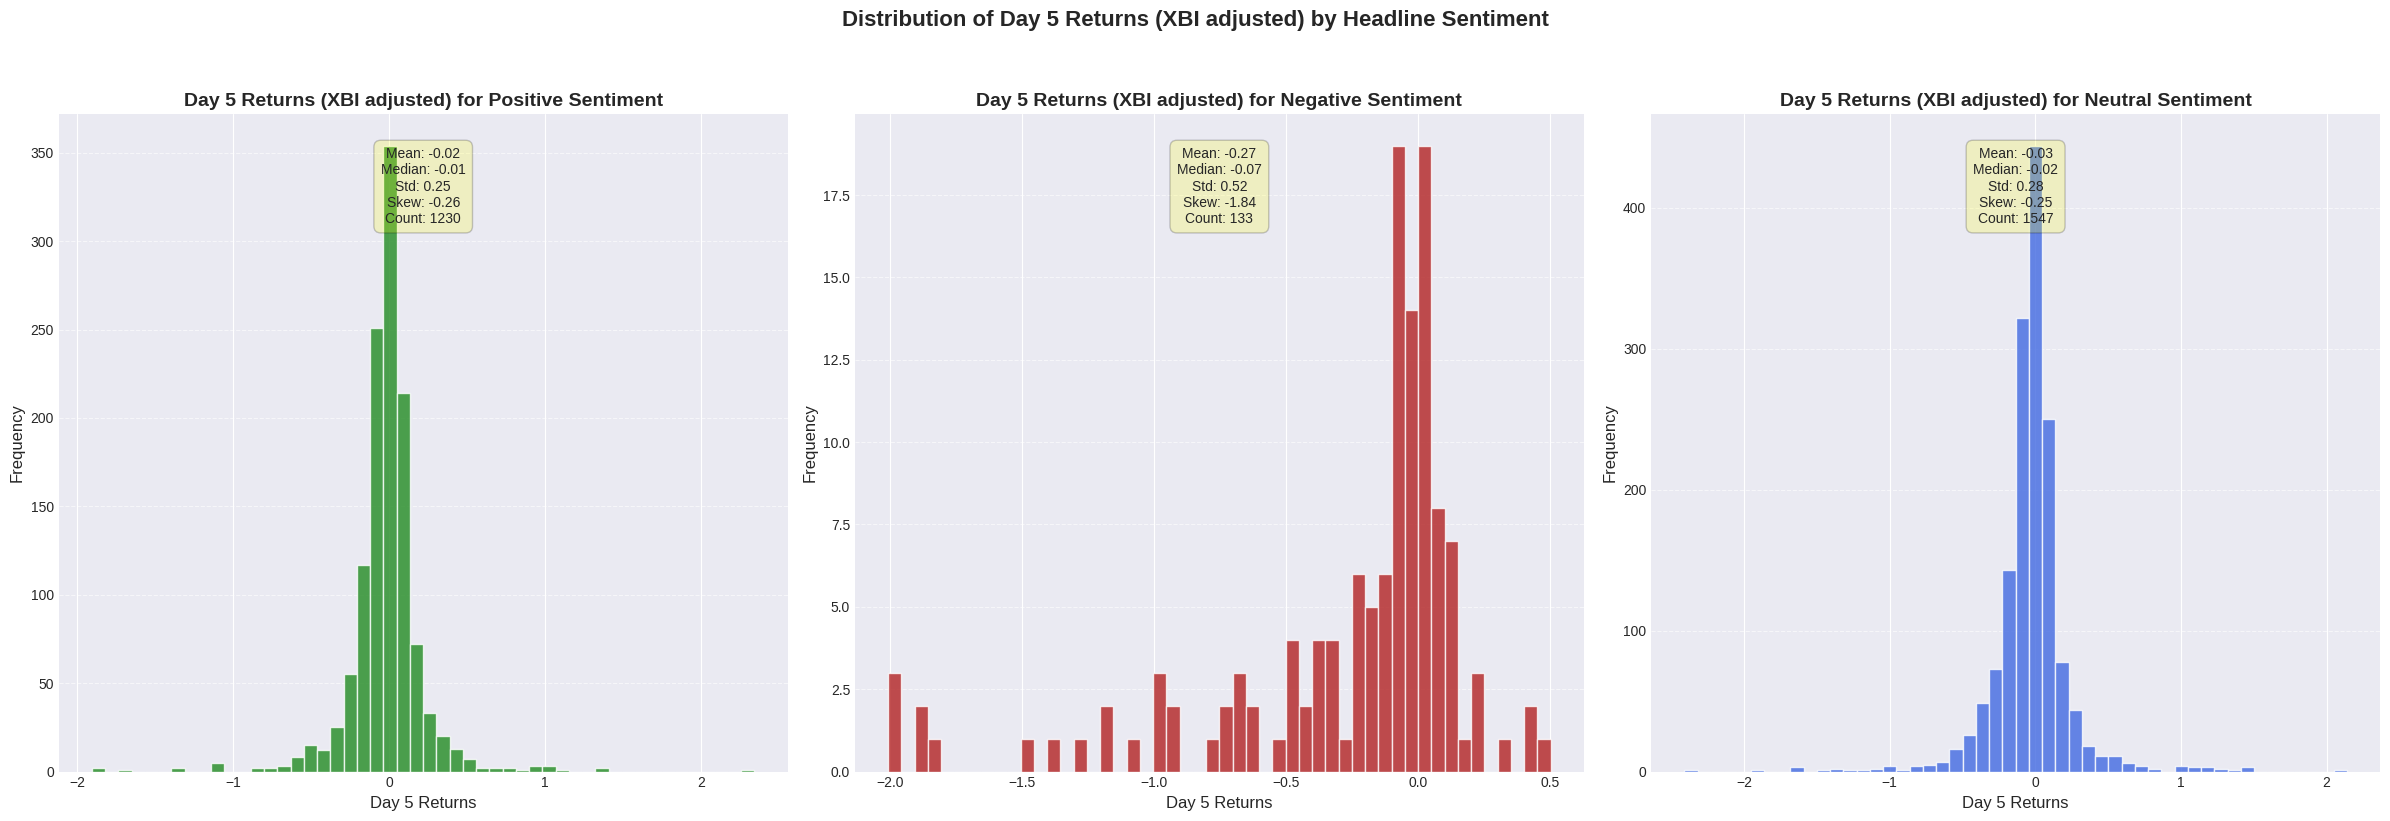

In [ ]:
# Filter the DataFrame for headline_sentiment = 1, -1, and 0
returns_sentiment_pos = full_df[full_df['headline_sentiment'] == 1]['XBI_adjusted_Perc_Return_D5']
returns_sentiment_neg = full_df[full_df['headline_sentiment'] == -1]['XBI_adjusted_Perc_Return_D5']
returns_sentiment_neu = full_df[full_df['headline_sentiment'] == 0]['XBI_adjusted_Perc_Return_D5']

# Calculate summary statistics for each sentiment category, including skewness
stats_pos = returns_sentiment_pos.agg(['mean', 'median', 'std', 'count', 'skew'])
stats_neg = returns_sentiment_neg.agg(['mean', 'median', 'std', 'count', 'skew'])
stats_neu = returns_sentiment_neu.agg(['mean', 'median', 'std', 'count', 'skew'])

# Apply a style for a prettier look
plt.style.use('seaborn-v0_8-darkgrid') # Using a seaborn style for enhanced aesthetics

plt.figure(figsize=(24, 8)) # Adjust figure size to accommodate three subplots and subtitles

# Subplot 1: headline_sentiment = 1
plt.subplot(1, 3, 1) # 1 row, 3 columns, first plot
plt.hist(returns_sentiment_pos, bins=50, color='forestgreen', edgecolor='white', alpha=0.8)
plt.title('Day 5 Returns (XBI adjusted) for Positive Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Day 5 Returns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.text(0.5, 0.95, f"Mean: {stats_pos['mean']:.2f}\nMedian: {stats_pos['median']:.2f}\nStd: {stats_pos['std']:.2f}\nSkew: {stats_pos['skew']:.2f}\nCount: {int(stats_pos['count'])}",
         horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2))

# Subplot 2: headline_sentiment = -1
plt.subplot(1, 3, 2) # 1 row, 3 columns, second plot
plt.hist(returns_sentiment_neg, bins=50, color='firebrick', edgecolor='white', alpha=0.8)
plt.title('Day 5 Returns (XBI adjusted) for Negative Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Day 5 Returns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.text(0.5, 0.95, f"Mean: {stats_neg['mean']:.2f}\nMedian: {stats_neg['median']:.2f}\nStd: {stats_neg['std']:.2f}\nSkew: {stats_neg['skew']:.2f}\nCount: {int(stats_neg['count'])}",
         horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2))

# Subplot 3: headline_sentiment = 0
plt.subplot(1, 3, 3) # 1 row, 3 columns, third plot
plt.hist(returns_sentiment_neu, bins=50, color='royalblue', edgecolor='white', alpha=0.8)
plt.title('Day 5 Returns (XBI adjusted) for Neutral Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Day 5 Returns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.text(0.5, 0.95, f"Mean: {stats_neu['mean']:.2f}\nMedian: {stats_neu['median']:.2f}\nStd: {stats_neu['std']:.2f}\nSkew: {stats_neu['skew']:.2f}\nCount: {int(stats_neu['count'])}",
         horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2))

plt.suptitle('Distribution of Day 5 Returns (XBI adjusted) by Headline Sentiment', fontsize=16, fontweight='bold', y=1.02) # Overall title
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent overlap with suptitle
plt.savefig("/content/drive/My Drive/DS266/Final Project/BERT-BASE/out/5day_return_histogram_xbi_adjusted_by_sentiment.png", dpi=400)
plt.show()

### Create SRRK Stock Chart

In [ ]:
display(full_df.iloc[2111])

,2111
Ticker,SRRK
Drug,Apitegromab - (SAPPHIRE)
Indication,Type 2 and Type 3 Spinal Muscular Atrophy (SMA)Â
Stage,Phase 3
Date,2024-10-07
Catalyst,"Phase 3 study met its primary endpoint, demons..."
Shares_Millions,96.0
Market_Cap,2743.51832
Volatility,225.1463
Share_Price_D-1,7.42


In [ ]:
import yfinance as yf
import pandas as pd # Ensure pandas is imported as it's used later

ticker_symbol = 'SRRK'
start_date = '2024-10-01'
end_date = '2024-10-15'

# Download historical data with auto_adjust=True to suppress the FutureWarning
srrk_data = yf.download(ticker_symbol, start=start_date, end=end_date, auto_adjust=True)

# Display the first few rows of the downloaded data
print("Downloaded SRRK stock data:")
display(srrk_data.head())

# Calculate the percentage decrease between March 7, 2024, and March 8, 2024
# Convert dates to datetime objects for accurate indexing
date_4_oct = pd.to_datetime('2024-10-04')
date_7_oct = pd.to_datetime('2024-10-07')

# Check if the dates exist in the index and extract closing prices
if date_4_oct in srrk_data.index and date_7_oct in srrk_data.index:
    close_price_oct_4 = srrk_data.loc[date_4_oct, 'Close'].iloc[0]
    close_price_oct_7 = srrk_data.loc[date_7_oct, 'Close'].iloc[0]

    # Calculate percentage decrease
    percentage_increase = ((close_price_oct_7-close_price_oct_4) / close_price_oct_4) * 100

    print(f"\nClosing price on October 4, 2024: {close_price_oct_4:.2f}")
    print(f"Closing price on October 7, 2024: {close_price_oct_7:.2f}")
    print(f"Percentage increase from October 4 to October 7: {percentage_increase:.2f}%")
else:
    print("\nCould not find closing prices for October 4 or October 7, 2024. Please check the date range or data availability.")

[*********************100%***********************]  1 of 1 completed

Downloaded SRRK stock data:


Price,Close,High,Low,Open,Volume
Ticker,SRRK,SRRK,SRRK,SRRK,SRRK
Date,,,,,
2024-10-01,7.450000,8.116000,7.165,7.95,1479400
2024-10-02,7.350000,7.400000,6.870,7.40,993800
2024-10-03,7.070000,7.438000,6.760,7.27,1098400
2024-10-04,7.420000,7.435000,7.110,7.17,648600
2024-10-07,34.279999,34.380001,25.150,26.34,42667700



Closing price on October 4, 2024: 7.42
Closing price on October 7, 2024: 34.28
Percentage increase from October 4 to October 7: 361.99%


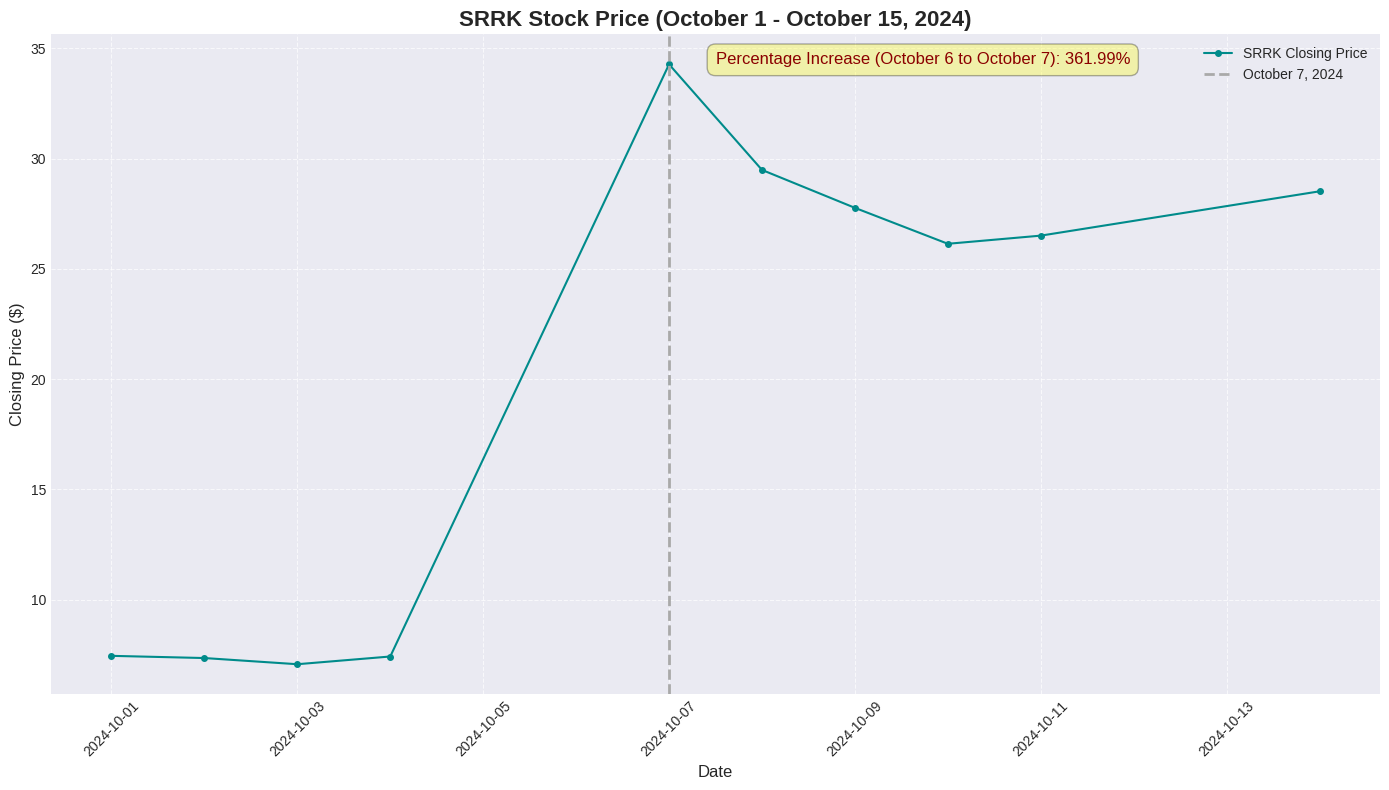

In [ ]:
# Apply a style for a prettier look, consistent with previous plots
plt.style.use('seaborn-v0_8-darkgrid')

# Create a single figure
fig, ax = plt.subplots(figsize=(14, 8)) # Adjusted figure size for a single plot

# --- Main Plot: AMLX Stock Price ---
ax.plot(srrk_data.index, srrk_data['Close'], color='darkcyan', marker='o', linestyle='-', markersize=4, label='SRRK Closing Price')

# Add a vertical line on October 7, 2024
oct_7_date = pd.to_datetime('2024-10-07')
ax.axvline(x=oct_7_date, color='darkgray', linestyle='--', linewidth=2, label='October 7, 2024')

# Add the percentage decrease as a subtitle
ax.set_title('SRRK Stock Price (October 1 - October 15, 2024)', fontsize=16, fontweight='bold')
ax.text(0.5, 0.95, f'Percentage Increase (October 6 to October 7): {percentage_increase:.2f}%',
         horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12, color='darkred', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Closing Price ($)', fontsize=12)
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Create AMLX stock chart
Install `yfinance`, then download historical stock data for 'AMLX' from March 1, 2024, to March 15, 2024. Calculate the percentage decrease in the closing price between March 7, 2024, and March 8, 2024. Generate a two-subplot chart: the main plot will display the AMLX stock price for the period, with a vertical line on March 8, 2024, and the second subplot will show the calculated percentage decrease. Ensure the chart has appropriate labels, titles, and styles, and then summarize key observations from the chart and the calculated decrease.

In [ ]:
display(full_df.iloc[387])

,387
Ticker,AMLX
Drug,AMX0035 - (A35-004 PHOENIX)
Indication,Amyotrophic Lateral Sclerosis (AML)Â
Stage,Phase 3
Date,2024-03-08
Catalyst,Phase 3 topline results did not meet the prima...
Shares_Millions,89.0
Market_Cap,227.74799
Volatility,256.5398
Share_Price_D-1,18.97


In [ ]:
import yfinance as yf
import pandas as pd # Ensure pandas is imported as it's used later

ticker_symbol = 'AMLX'
start_date = '2024-03-01'
end_date = '2024-03-15'

# Download historical data with auto_adjust=True to suppress the FutureWarning
amlx_data = yf.download(ticker_symbol, start=start_date, end=end_date, auto_adjust=True)

# Display the first few rows of the downloaded data
print("Downloaded AMLX stock data:")
display(amlx_data.head())

# Calculate the percentage decrease between March 7, 2024, and March 8, 2024
# Convert dates to datetime objects for accurate indexing
date_7_march = pd.to_datetime('2024-03-07')
date_8_march = pd.to_datetime('2024-03-08')

# Check if the dates exist in the index and extract closing prices
if date_7_march in amlx_data.index and date_8_march in amlx_data.index:
    close_price_march_7 = amlx_data.loc[date_7_march, 'Close'].iloc[0]
    close_price_march_8 = amlx_data.loc[date_8_march, 'Close'].iloc[0]

    # Calculate percentage decrease
    percentage_decrease = ((close_price_march_7 - close_price_march_8) / close_price_march_7) * 100

    print(f"\nClosing price on March 7, 2024: {close_price_march_7:.2f}")
    print(f"Closing price on March 8, 2024: {close_price_march_8:.2f}")
    print(f"Percentage decrease from March 7 to March 8: {percentage_decrease:.2f}%")
else:
    print("\nCould not find closing prices for March 7 or March 8, 2024. Please check the date range or data availability.")

[*********************100%***********************]  1 of 1 completed

Downloaded AMLX stock data:


Price,Close,High,Low,Open,Volume
Ticker,AMLX,AMLX,AMLX,AMLX,AMLX
Date,,,,,
2024-03-01,18.709999,19.200001,18.580000,19.040001,1125700
2024-03-04,19.139999,19.219999,17.940001,19.200001,1840200
2024-03-05,18.850000,19.420000,18.400000,19.110001,1220600
2024-03-06,19.049999,19.320000,18.655001,18.870001,1635900
2024-03-07,18.969999,19.180000,18.660000,18.920000,1509700



Closing price on March 7, 2024: 18.97
Closing price on March 8, 2024: 3.36
Percentage decrease from March 7 to March 8: 82.29%


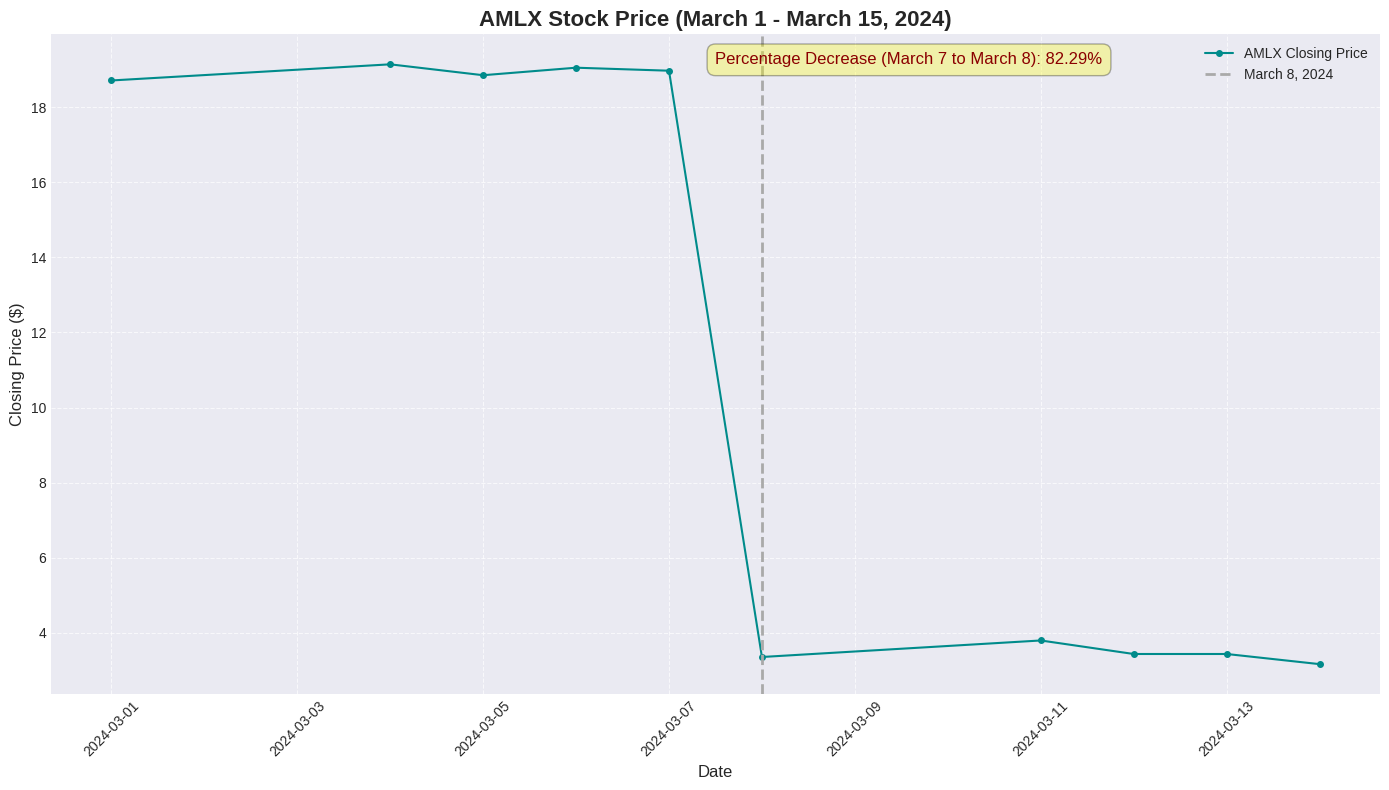

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Apply a style for a prettier look, consistent with previous plots
plt.style.use('seaborn-v0_8-darkgrid')

# Create a single figure
fig, ax = plt.subplots(figsize=(14, 8)) # Adjusted figure size for a single plot

# --- Main Plot: AMLX Stock Price ---
ax.plot(amlx_data.index, amlx_data['Close'], color='darkcyan', marker='o', linestyle='-', markersize=4, label='AMLX Closing Price')

# Add a vertical line on March 8, 2024
march_8_date = pd.to_datetime('2024-03-08')
ax.axvline(x=march_8_date, color='darkgray', linestyle='--', linewidth=2, label='March 8, 2024')

# Add the percentage decrease as a subtitle
ax.set_title('AMLX Stock Price (March 1 - March 15, 2024)', fontsize=16, fontweight='bold')
ax.text(0.5, 0.95, f'Percentage Decrease (March 7 to March 8): {percentage_decrease:.2f}%',
         horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12, color='darkred', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Closing Price ($)', fontsize=12)
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Summary of Observations

**Calculated Decrease:**
- The closing price of AMLX significantly decreased by **82.29%** from March 7, 2024 (18.97) to March 8, 2024 (3.36).

**Chart Observations:**
- **Main Plot (AMLX Stock Price):** The stock price remained relatively stable around $18-$19 from March 1st to March 7th. A dramatic drop is clearly visible on March 8th, indicated by both the plot line and the vertical red line, where the price plummets to approximately $3.36.
- **Second Subplot (Percentage Decrease):** This bar chart visually confirms the substantial 82.29% drop, highlighting the severe negative impact on the stock price in a single day.

**Key Takeaways:**
- There was a significant negative event or news that caused a massive sell-off in AMLX stock on March 8, 2024, leading to over an 80% loss in value within a single trading day. This could indicate a major announcement, such as a failed clinical trial, regulatory setback, or other adverse corporate news.

## Summary:

### Q&A
The generated stock chart illustrates a dramatic drop in AMLX's stock price, with a calculated percentage decrease of **82.29%** between March 7, 2024, and March 8, 2024. The stock price was relatively stable around \$18-\$19 from March 1st to March 7th, before plummeting to approximately \$3.36 on March 8th. The second subplot visually confirms this substantial drop.

### Data Analysis Key Findings
*   The `yfinance` library was successfully installed and used to download historical stock data for 'AMLX' from March 1, 2024, to March 15, 2024.
*   The closing price of AMLX on March 7, 2024, was \$18.97, and on March 8, 2024, it was \$3.36.
*   The calculated percentage decrease in the closing price between March 7, 2024, and March 8, 2024, was a significant **82.29%**.
*   The generated two-subplot chart effectively visualized this event, showing a stable price trend leading up to March 8th, followed by a sharp decline marked by a vertical line, and a bar chart explicitly displaying the 82.29% decrease.

### Insights or Next Steps
*   The massive 82.29% drop in AMLX's stock value on March 8, 2024, strongly suggests a significant negative event or news, such as a failed clinical trial, regulatory setback, or other adverse corporate announcement, occurred on or just before that date.
*   A crucial next step would be to investigate financial news archives and company announcements specifically for AMLX around March 8, 2024, to identify the root cause of this severe stock price depreciation.


### Looking at whether there is correlation to degree of stock movement to other factors, stratified by positive, negative and neutral events
Prepare data for correlation analysis by filtering the `full_df` into three separate DataFrames based on `headline_sentiment` (1, -1, and 0), selecting relevant numerical columns for each. Then, calculate and visualize the correlation matrix for each sentiment-specific DataFrame using `seaborn.heatmap`, ensuring clear titles and saving the plots to the output directory. Finally, summarize the insights gained from comparing the three correlation matrices, highlighting any significant differences or patterns across positive, negative, and neutral sentiment categories.

In [ ]:
columns_to_select = ['Shares_Millions', 'Market_Cap', 'Volatility', 'Share_Price_D-1', 'Share_Price_D1', 'Share_Price_D5', 'Perc_Return_D1', 'Perc_Return_D5', 'XBI_Return_D1', 'XBI_Return_D5', 'Short_Interest_Pct', 'Year_Beta', 'Daily_Volum_Traded', 'has_endpoint', 'has_pvalue', 'has_effect', 'has_safety', 'has_sample', 'has_phase', 'has_partner', 'has_regulatory', 'has_financial', 'has_enrollment', 'has_clinical', 'has_catalyst', 'pos_count', 'neg_count', 'neu_count', 'XBI_adjusted_Perc_Return_D1', 'XBI_adjusted_Perc_Return_D5']

# Filter full_df into three DataFrames based on headline_sentiment
df_pos = full_df[full_df['headline_sentiment'] == 1][columns_to_select]
df_neg = full_df[full_df['headline_sentiment'] == -1][columns_to_select]
df_neu = full_df[full_df['headline_sentiment'] == 0][columns_to_select]

print(f"Shape of df_pos: {df_pos.shape}")
print(f"Shape of df_neg: {df_neg.shape}")
print(f"Shape of df_neu: {df_neu.shape}")
print("DataFrames created and relevant numerical columns selected.")

Shape of df_pos: (1230, 30)
Shape of df_neg: (133, 30)
Shape of df_neu: (1547, 30)
DataFrames created and relevant numerical columns selected.


In [ ]:
corr_pos = df_pos.corr().fillna(0)
corr_neg = df_neg.corr().fillna(0)
corr_neu = df_neu.corr().fillna(0)

print("Correlation matrices calculated and NaN values filled with 0.")

Correlation matrices calculated and NaN values filled with 0.


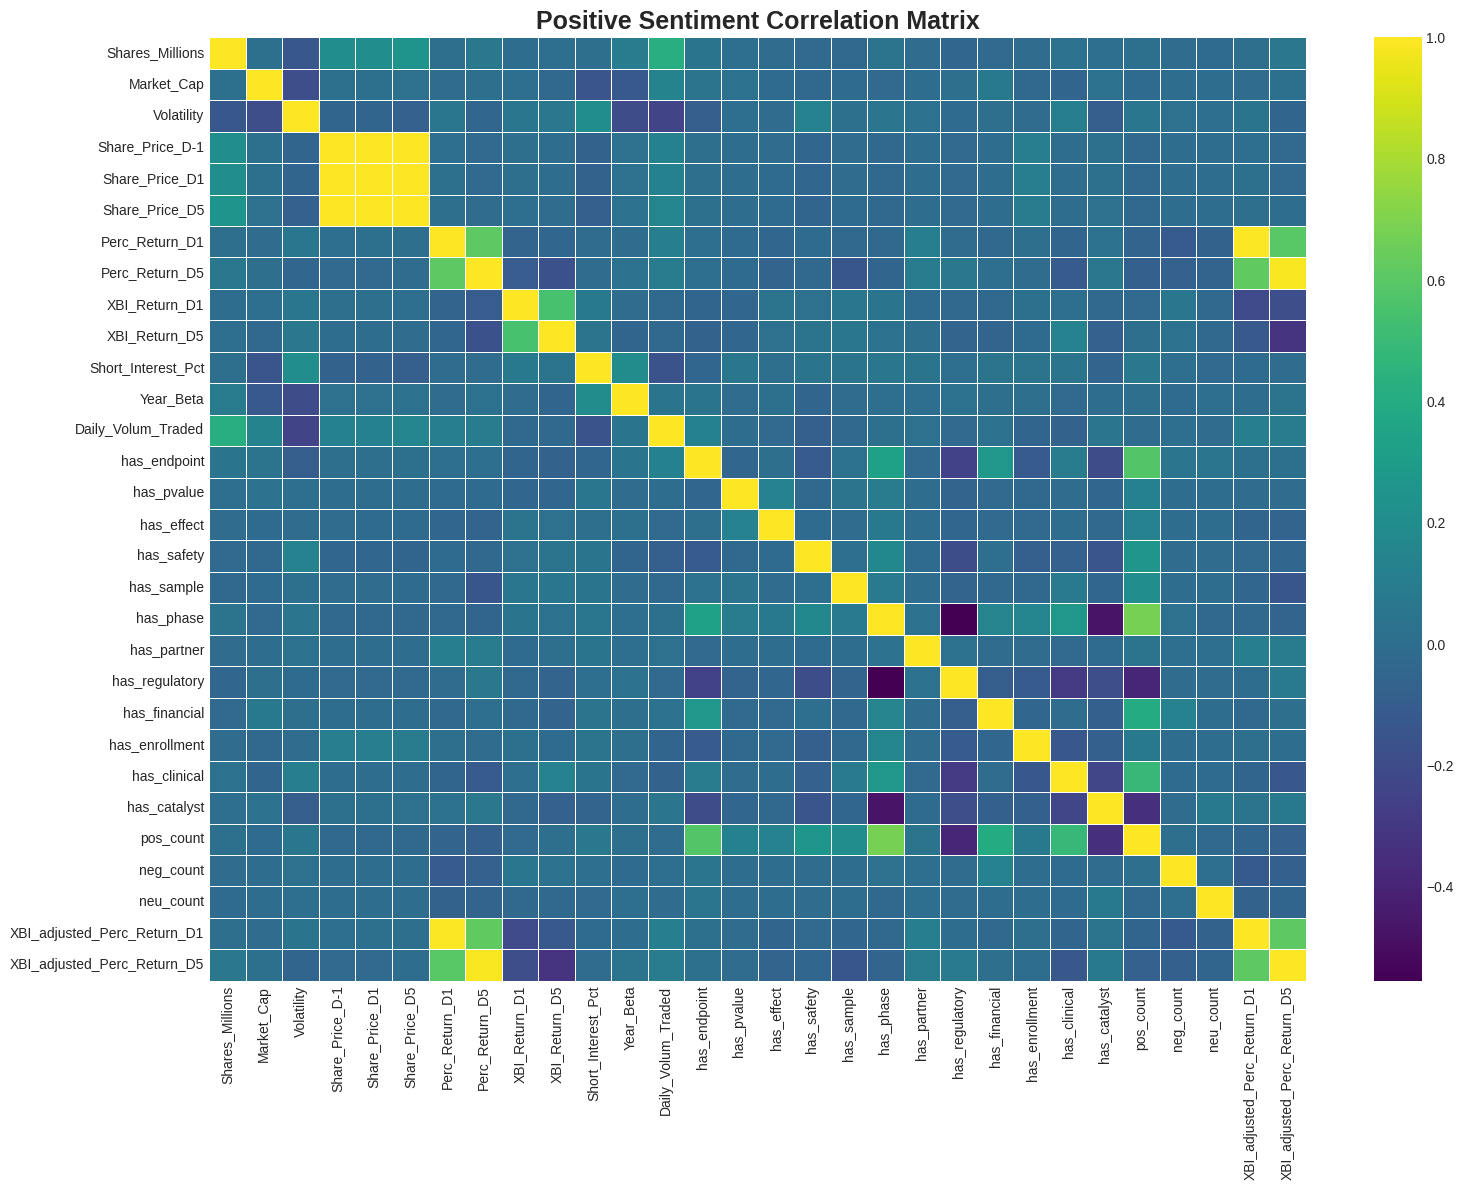

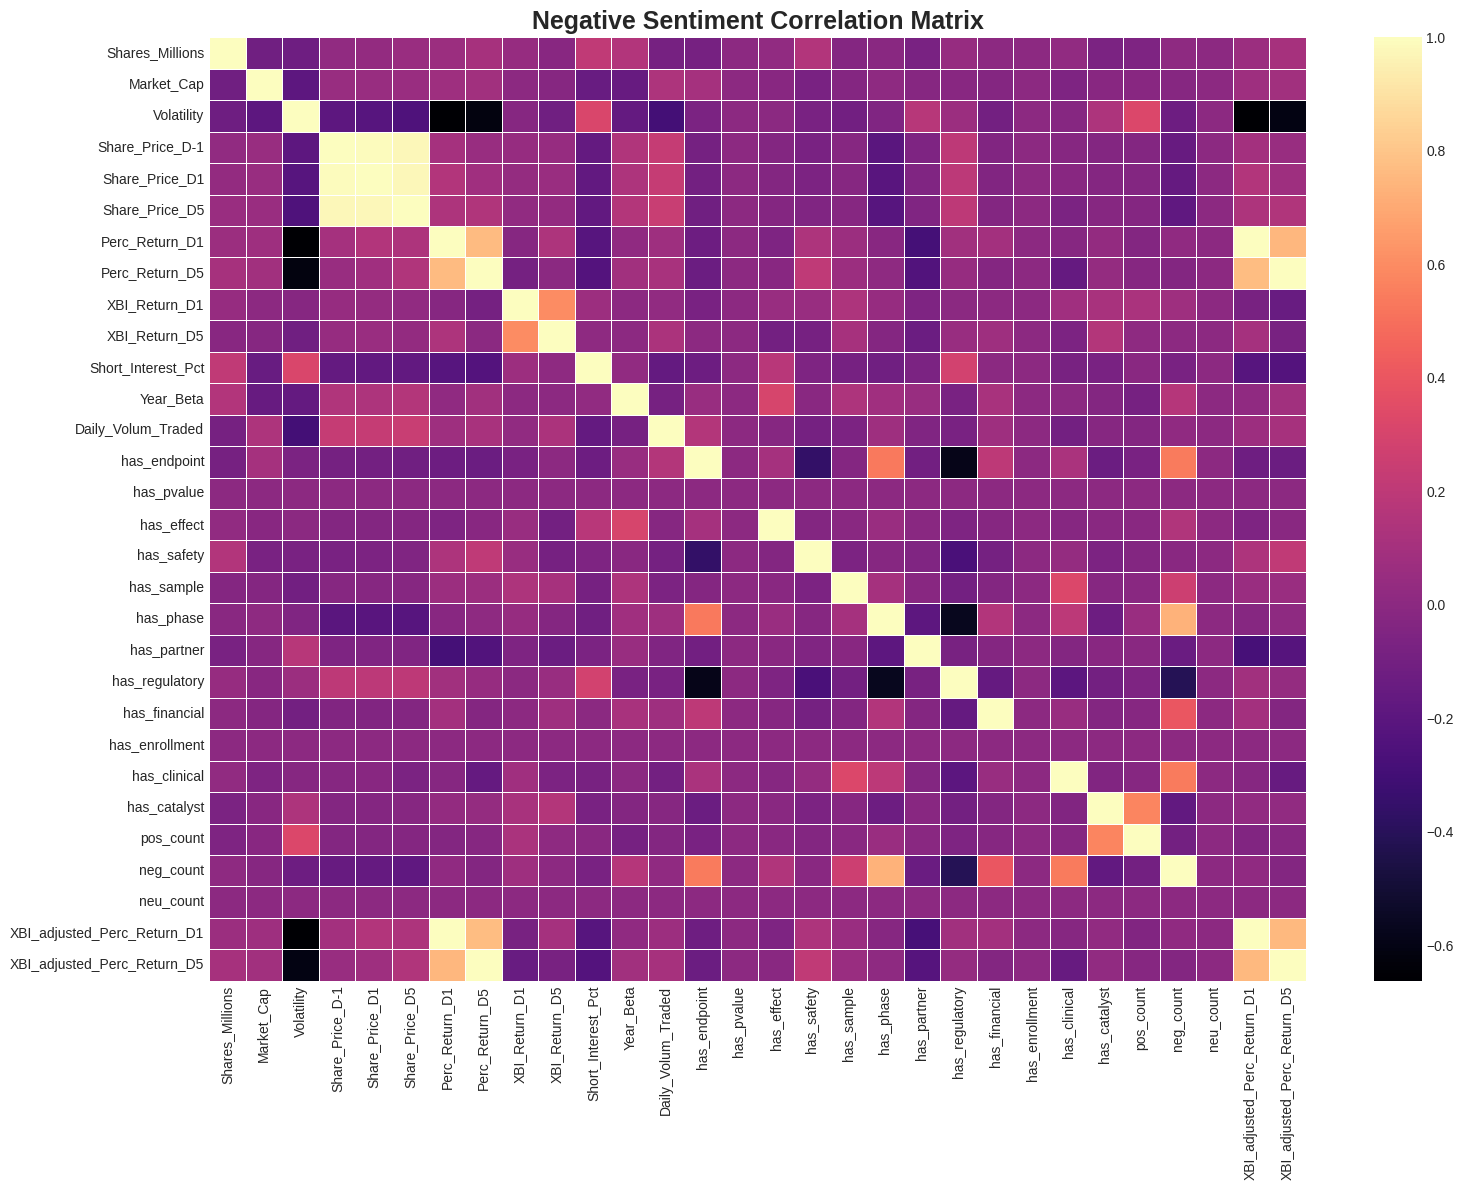

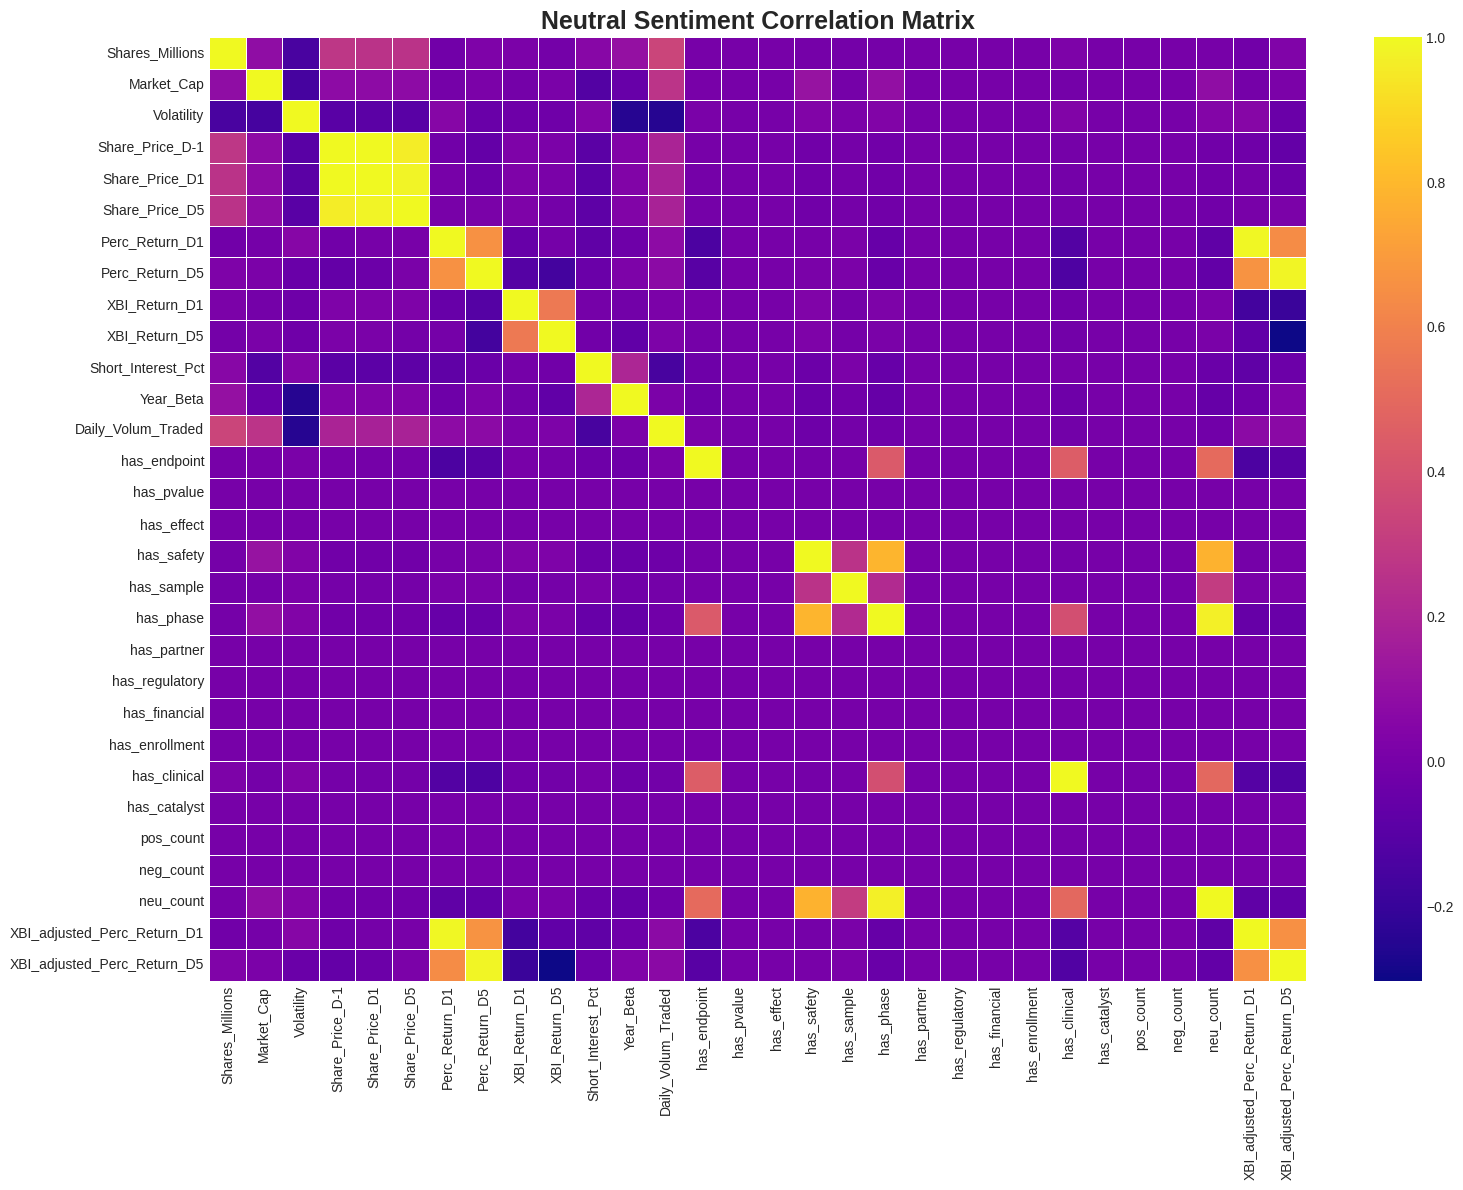

Heatmaps for positive, negative, and neutral sentiment correlation matrices generated and saved.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent style for plots
plt.style.use('seaborn-v0_8-darkgrid')

# --- Heatmap for Positive Sentiment ---
plt.figure(figsize=(16, 12)) # Adjust figure size for better readability
sns.heatmap(corr_pos, annot=False, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Positive Sentiment Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("/content/drive/My Drive/DS266/Final Project/BERT-BASE/out/correlation_matrix_positive.png", dpi=300)
plt.show()

# --- Heatmap for Negative Sentiment ---
plt.figure(figsize=(16, 12))
sns.heatmap(corr_neg, annot=False, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Negative Sentiment Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("/content/drive/My Drive/DS266/Final Project/BERT-BASE/out/correlation_matrix_negative.png", dpi=300)
plt.show()

# --- Heatmap for Neutral Sentiment ---
plt.figure(figsize=(16, 12))
sns.heatmap(corr_neu, annot=False, cmap='plasma', fmt=".2f", linewidths=.5)
plt.title('Neutral Sentiment Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("/content/drive/My Drive/DS266/Final Project/BERT-BASE/out/correlation_matrix_neutral.png", dpi=300)
plt.show()

print("Heatmaps for positive, negative, and neutral sentiment correlation matrices generated and saved.")

### Data Analysis Key Findings
*   The `full_df` was successfully partitioned into three sentiment-specific DataFrames: `df_pos` (1230 rows), `df_neg` (133 rows), and `df_neu` (1547 rows), each containing 30 selected numerical columns.
*   Correlation matrices were calculated for each sentiment category (`corr_pos`, `corr_neg`, `corr_neu`), and missing correlation values were replaced with 0.
*   Distinct heatmaps were generated for each sentiment category, allowing for visual comparison of correlation patterns.
*   The size disparity among sentiment categories is notable, with negative sentiment having significantly fewer data points (133 rows) compared to positive and neutral sentiments. This difference in sample size could influence the robustness and interpretation of correlations for `df_neg`.
*   The presence of varying correlation patterns across the three sentiment categories implies that the predictive power and interrelationships of features like `Shares_Millions`, `Market_Cap`, `Volatility`, various `Share_Price` and `Perc_Return` metrics, and textual feature counts (`pos_count`, `neg_count`, `neu_count`) are not uniform but are context-dependent on headline sentiment.
